# Case Web Motors

### Contexto:
* A Webmotors dispõe de diversos produtos digitais para solucionar problemas durante a compra, utilização e venda de um veículo, sendo um de seus principais e mais conhecidos o classificado. Para o classificado utilizamos o lead model para monetizar nosso produto. Um lead é uma demonstração de interesse de um comprador para um vendedor.

### Definições:
> Lead: Demonstração de interesse de um comprador por um produto de algum vendedor  
>Dados: 0 -> Não; 1 -> Sim

### Tarefa:
* Determine ao menos uma alternativa para potencializar o recebimento de leads dos anúncios.

### Parte1: 
Exploração dos Dados buscando a correlação dos leads com as outras variáveis

### Parte 2:
Desenvolver um modelo para de determinar se um anúncio receberá lead.  
Que outras informações, as quais você não teve acesso, poderiam ajudar a chegar a conclusões melhores?

### Parte 3 (Bônus!!!)
Proponha um modelo para determinar a quantidade de leads que um anúncio irá receber

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


pd.set_option('max_columns', None)

In [2]:
print(os.getcwd())

c:\FCD\Case-GCBInvestimentos


In [3]:
# Dicionária do que significa as colunas no dataset
dicionario = pd.read_csv('Case 1 - dicionario.csv')
dicionario

,attribute,description
0,cod_anuncio,código do anúncio
1,cod_cliente,código do anunciante
2,cod_tipo_pessoa,"tipo de anunciante: PF=1, PJ=2"
3,prioridade,"prioridade do anúncio (1=alta, 2-média, 3-baixa)"
4,leads,tota de propostas recebidas
5,views,quantidade de visualizações no anúncio
6,cliques_telefone,quantidade de cliques no telefone anunciado
7,cod_marca_veiculo,código da marca do veículo
8,cod_modelo_veiculo,código do modelo veículo
9,cod_versao_veiculo,código da versão do veículo


In [4]:
df = pd.read_csv('Case 1 - dados.csv')
df.head()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,2,7941,2,3,1,0,0,34,769,346932,2018,75,GO_Itumbiara,110990.0,7,0,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1770,1,3,1,0,4,2,704,340148,1996,6,SP_Osasco,8300.0,0,689815,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,alcool,manual,2.0,S,NaN,S,N,N,S,N,S,S,N,N,N
2,8,709,1,3,4,0,11,30,1071,310713,2002,2,SP_SÃ£o Paulo,38800.0,4,33700,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina,manual,4.0,S,NaN,S,N,S,S,S,S,S,S,N,N
3,13,9708,1,2,12,0,14,10,2028,341195,1995,4,SP_SÃ£o Paulo,44000.0,8,105000,NaN,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina,automatico,2.0,N,S,S,S,S,N,N,S,S,S,N,N
4,15,1363,1,2,8,0,11,12,805,332063,1995,5,SP_SÃ£o Paulo,30000.0,6,71240,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina,automatico,4.0,S,N,S,S,S,S,S,S,S,S,N,N


# Limpeza e Tratamento de Dados

In [5]:
# Temos 48665 registros e 41 colunas
df.shape

(48665, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48665 entries, 0 to 48664
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cod_anuncio                        48665 non-null  int64  
 1   cod_cliente                        48665 non-null  int64  
 2   cod_tipo_pessoa                    48665 non-null  int64  
 3   prioridade                         48665 non-null  int64  
 4   leads                              48665 non-null  int64  
 5   views                              48665 non-null  int64  
 6   cliques_telefone*                  48665 non-null  int64  
 7   cod_marca_veiculo                  48665 non-null  int64  
 8   cod_modelo_veiculo                 48665 non-null  int64  
 9   cod_versao_veiculo                 48665 non-null  int64  
 10  ano_modelo                         48665 non-null  int64  
 11  cep_2dig                           48665 non-null  int

In [7]:
df.dtypes.value_counts()

int64      19
object     15
float64     7
dtype: int64

### Valores NA

In [8]:
# Verificação de valores missing
df.isna().sum()

cod_anuncio                             0
cod_cliente                             0
cod_tipo_pessoa                         0
prioridade                              0
leads                                   0
views                                   0
cliques_telefone*                       0
cod_marca_veiculo                       0
cod_modelo_veiculo                      0
cod_versao_veiculo                      0
ano_modelo                              0
cep_2dig                                0
uf_cidade                               0
vlr_anuncio                             0
qtd_fotos                               0
km_veiculo                              0
vlr_mercado                          6217
flg_unico_dono                          0
flg_licenciado                          0
flg_ipva_pago                         312
flg_todas_revisoes_concessionaria     312
flg_todas_revisoes_agenda_veiculo       0
flg_garantia_fabrica                  312
flg_blindado                      

In [9]:
# Vamos remover registros que tenham os valores missings
df = df.dropna(axis = 0).reset_index(drop = True)

In [10]:
df.shape

(42157, 41)

In [11]:
df.isna().any().sum()

0

In [12]:
# Ainda temos um data cerca de 87% do nosso dataset original
len(df)/48665

0.8662693927874242

### Valores duplicados

In [13]:
# Verificação de valores duplicados
df.duplicated().sum()

0

* Não há valores duplicados

### Valores Inconsistentes

In [14]:
# Iremos remover registros onde o número de 'views' sejam menor que o número de 'leads'. Esta informação nãao faz sentido pois não é possível
# ocorrer um lead sem anter ter um view do anúncio.
# Temos diversos registros onde houve 0 'views' e um valor, as vezes até relativamente altos, de 'leads'.
index_to_drop = df[(df.views < df.leads)].index

In [15]:
df.drop(df.index[(index_to_drop)], inplace = True)

In [16]:
df.shape

(41322, 41)

In [17]:
df.head(3)

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
2,95,16462,1,1,0,0,6,12,2722,342061,2010,8,SP_PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,S,S,S,S,S,S,S,S,S,S,S,S
3,110,1987,1,1,0,0,2,2,1161,339241,2009,1,SP_SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
4,117,18367,1,1,0,0,10,3,687,344077,2010,9,SP_SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,N,N,S,N,S,N,S,S,S,S,N,N


# Análise Exploratória dos Dados

### Análise da Variável Target

In [18]:
df.leads.describe()

count    41322.000000
mean         3.600261
std          8.712076
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        348.000000
Name: leads, dtype: float64

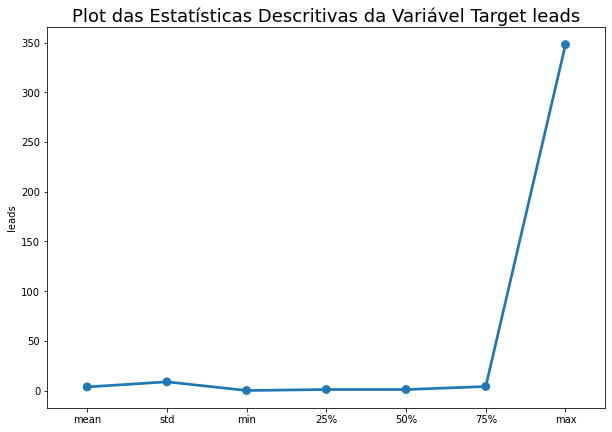

In [253]:
# Plot do describe da variável 'leads'

describe_lead = pd.DataFrame(df['leads'].describe())
describe_lead

plt.figure(figsize = (10,7))
sns.pointplot(data = describe_lead, y = describe_lead.leads[1:], x = describe_lead.index[1:])
plt.title('Plot das Estatísticas Descritivas da Variável Target leads', fontdict={'fontsize':18})
plt.show()

A grande maioria dos anuncios possuem lead baixos, cerca de 75% deles estão com até 4 leads

In [19]:
# Quase da metade dos anúncios possuem apenas 1 lead
df.leads.value_counts().head(5)

1     20638
0      9286
4      5439
8      2276
12     1198
Name: leads, dtype: int64

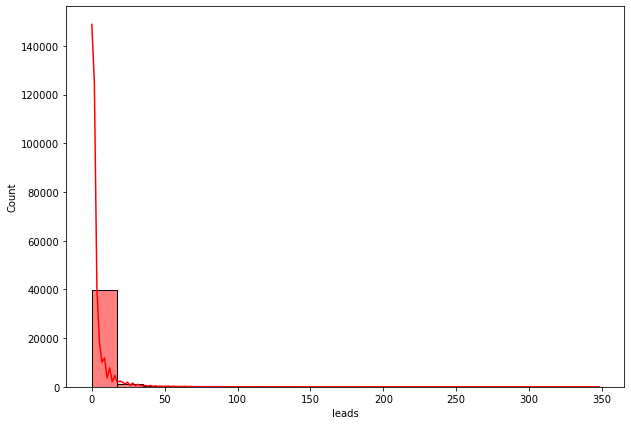

In [20]:
# Visualização da distribuição da variável target (leads)
plt.figure(figsize = (10,7))

sns.histplot(data = df, x = df.leads, bins = 20, color = 'r', kde = True)

É possível verificar uma distribuição totalmente desbalanceada para a variável 'leads', com uma concetração de registros com até 10 leads

In [21]:
df.leads.describe()

count    41322.000000
mean         3.600261
std          8.712076
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        348.000000
Name: leads, dtype: float64

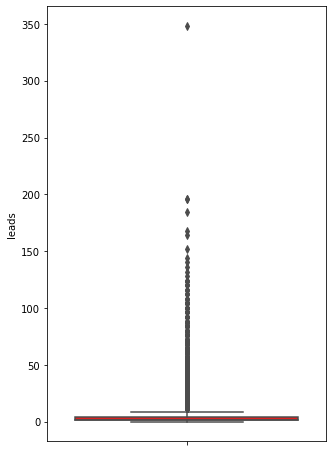

In [22]:
# Boxplot da variável target 'leads'
plt.figure(figsize= (5,8))

sns.boxplot(data = df, y = 'leads', orient = 'v', color = 'r')

É possível verificar uma grande quantidade de outliers.

In [89]:
# Visualizando os registros com maiores números de leads
df.iloc[df.leads.nlargest(5).index]

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf,cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
40843,140393,4155,2,3,348,392,201,16,1194,311585,2004,3,SP,SÃ£o Paulo,16990.0,1,110000,18985.25460,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina,manual,4.0,S,S,S,N,S,N,S,S,S,N,N,N
40791,110626,3412,2,3,196,236,149,2,3340,344558,2013,4,SP,SÃ£o Paulo,29900.0,5,21247,31744.32162,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina e alcool,manual,4.0,N,S,S,N,S,S,N,S,S,N,N,N
40829,108213,19289,1,1,196,228,179,16,3053,342656,2013,3,SP,SÃ£o Paulo,36500.0,8,68900,43563.58112,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina e alcool,automatico,4.0,S,S,S,S,S,S,S,S,S,S,N,N
37736,176263,4564,2,1,184,1000,136,218,3511,346906,2016,13,SP,Campinas,59990.0,8,34500,65879.97643,1,1,1.0,1.0,0,1.0,0,0,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
40026,137489,13067,1,1,168,372,152,17,3130,344308,2013,1,SP,SÃ£o Paulo,42000.0,8,65000,60415.40415,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina e alcool,automatico,4.0,S,S,S,S,S,S,S,S,S,S,N,N


In [23]:
# Vamos considerar outliers, registros com valores de zscore maior que t3

qtd_leads = []
zscore = stats.zscore(df.leads)
for i in zscore:
    if i > 3:
        qtd_leads.append(i)
print(len(qtd_leads))

# Temos 766 registros considaderados como outliers na coluna leads que poderão ser tratados posteriormente

766


In [24]:
df.columns

Index(['cod_anuncio', 'cod_cliente', 'cod_tipo_pessoa', 'prioridade', 'leads',
       'views', 'cliques_telefone*', 'cod_marca_veiculo', 'cod_modelo_veiculo',
       'cod_versao_veiculo', 'ano_modelo', 'cep_2dig', 'uf_cidade',
       'vlr_anuncio', 'qtd_fotos', 'km_veiculo', 'vlr_mercado',
       'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago',
       'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
       'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro',
       'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
       'rodasliga', 'sensorchuva', 'sensorestacion'],
      dtype='object')

In [25]:
# Separando as colunas numéricas das categóricas

num_var = ['leads', 'views', 'cliques_telefone*','vlr_anuncio', 'qtd_fotos', 'km_veiculo', 'vlr_mercado',]

cat_var = ['leads','cod_tipo_pessoa', 'prioridade','cod_marca_veiculo', 'cod_modelo_veiculo','cod_versao_veiculo', 'ano_modelo',
           'uf_cidade','flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago', 'flg_todas_revisoes_concessionaria',
           'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica','flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
           'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro', 'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
           'rodasliga', 'sensorchuva', 'sensorestacion']

## Variáveis Categóricas

* Como não é possível fazer correlação entre variáveis categóricas e variáveis contínuas ('leads'), irei separar as variáveis e análisar a influência delas na variável target('lead') e depois fazer concatenações com outras variáveis categóricas para verificar o quanto influencia na target

In [26]:
df_cat = df[cat_var]

In [27]:
df_cat.columns

Index(['leads', 'cod_tipo_pessoa', 'prioridade', 'cod_marca_veiculo',
       'cod_modelo_veiculo', 'cod_versao_veiculo', 'ano_modelo', 'uf_cidade',
       'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago',
       'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
       'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro',
       'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
       'rodasliga', 'sensorchuva', 'sensorestacion'],
      dtype='object')

In [28]:
# Criando uma lista com os nomes das colunas do tipo 'object'
obj_list = df.select_dtypes(include = ['object']).columns.to_list()
obj_list

['uf_cidade',
 'combustivel',
 'cambio',
 'alarme',
 'airbag',
 'arquente',
 'bancocouro',
 'arcondic',
 'abs',
 'desembtras',
 'travaeletr',
 'vidroseletr',
 'rodasliga',
 'sensorchuva',
 'sensorestacion']

In [29]:
# quantidade de valores unicos das marcas, modelos e versões dos carros anunciados
df[['cod_marca_veiculo','cod_modelo_veiculo','cod_versao_veiculo']].nunique()

cod_marca_veiculo       44
cod_modelo_veiculo     428
cod_versao_veiculo    2881
dtype: int64

In [30]:
# Cidades que mais aparecerem no dataset
df.uf_cidade.value_counts().head(10)

SP_SÃ£o Paulo                 7136
RJ_Rio de Janeiro             1841
PR_Curitiba                   1825
DF_BrasÃ­lia                  1477
MG_Belo Horizonte             1183
SP_Campinas                   1163
SP_SÃ£o Bernardo do Campo      701
SP_Santo AndrÃ©                637
RS_Porto Alegre                606
SP_SÃ£o JosÃ© do Rio Preto     587
Name: uf_cidade, dtype: int64

In [31]:
# Describe das variáveis do tipo 'object'
df[obj_list].describe()

,uf_cidade,combustivel,cambio,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
count,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322
unique,844,10,7,2,2,2,2,2,2,2,2,2,2,2,2
top,SP_SÃ£o Paulo,gasolina e alcool,manual,S,S,S,N,S,S,S,S,S,S,N,N
freq,7136,31650,23415,25751,28219,26243,28115,35562,26406,26278,35476,35188,22739,38106,29904


In [32]:
# Describe das variáveis categóricas que estão representadas numéricamente
df_cat.describe()

,leads,cod_tipo_pessoa,prioridade,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,portas
count,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000
mean,3.600261,1.882411,2.614781,18.643023,2072.048110,343161.451817,2013.517037,0.212574,0.299380,0.400610,0.148105,0.060500,0.069576,0.017013,0.070955,0.000387,3.780214
std,8.712076,0.322124,0.760240,36.442259,1110.922968,8338.140697,3.473578,0.409134,0.457992,0.490028,0.355208,0.238415,0.254433,0.129320,0.256753,0.019674,0.734626
min,0.000000,1.000000,1.000000,2.000000,650.000000,1429.000000,1951.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,3.000000,4.000000,788.000000,342655.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,2.000000,3.000000,5.000000,2487.000000,344131.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,4.000000,2.000000,3.000000,26.000000,3202.000000,345486.000000,2016.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,348.000000,2.000000,3.000000,304.000000,3676.000000,347728.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### Variável combustivel

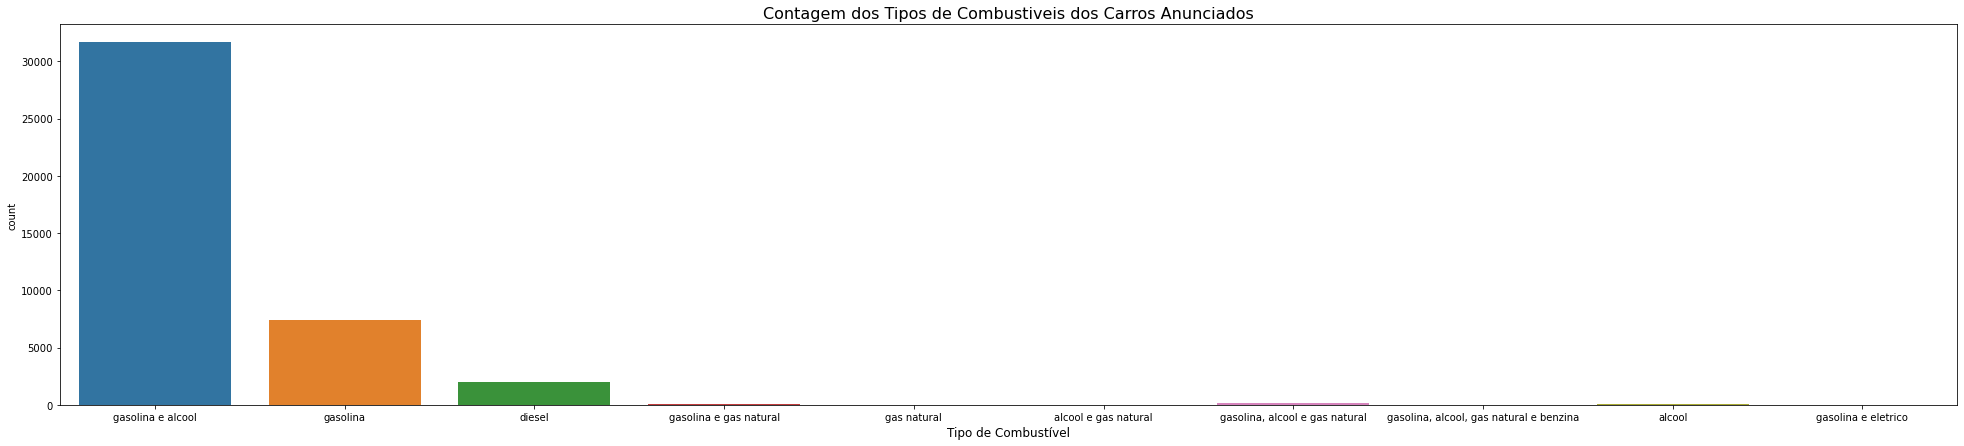

In [33]:
# Visualização da quantidade de anúncio pra cada tipo de combustível.
plt.figure(figsize = (34,7))

sns.countplot(x = df.combustivel)
plt.title('Contagem dos Tipos de Combustiveis dos Carros Anunciados', fontdict={'fontsize':16})
plt.xlabel('Tipo de Combustível', fontdict = {'fontsize': 12})
plt.show()

> A maior parte dos carros são flex(gasolina e álcool), seguidos por abastecimento a gasolina e diesel

Relação do Tipo de Combustível com a Variável Target 'leads'

In [98]:
# Agrupando por combustivel
df_comb = df_cat.groupby('combustivel').agg({'leads':'mean'}).sort_values('leads', ascending = False)
df_comb

,leads
combustivel,
"gasolina, alcool, gas natural e benzina",17.625000
gasolina e eletrico,5.750000
"gasolina, alcool e gas natural",5.218391
gasolina,4.949872
diesel,4.721797
gasolina e gas natural,3.413793
gasolina e alcool,3.204613
alcool,2.375000
gas natural,2.346154


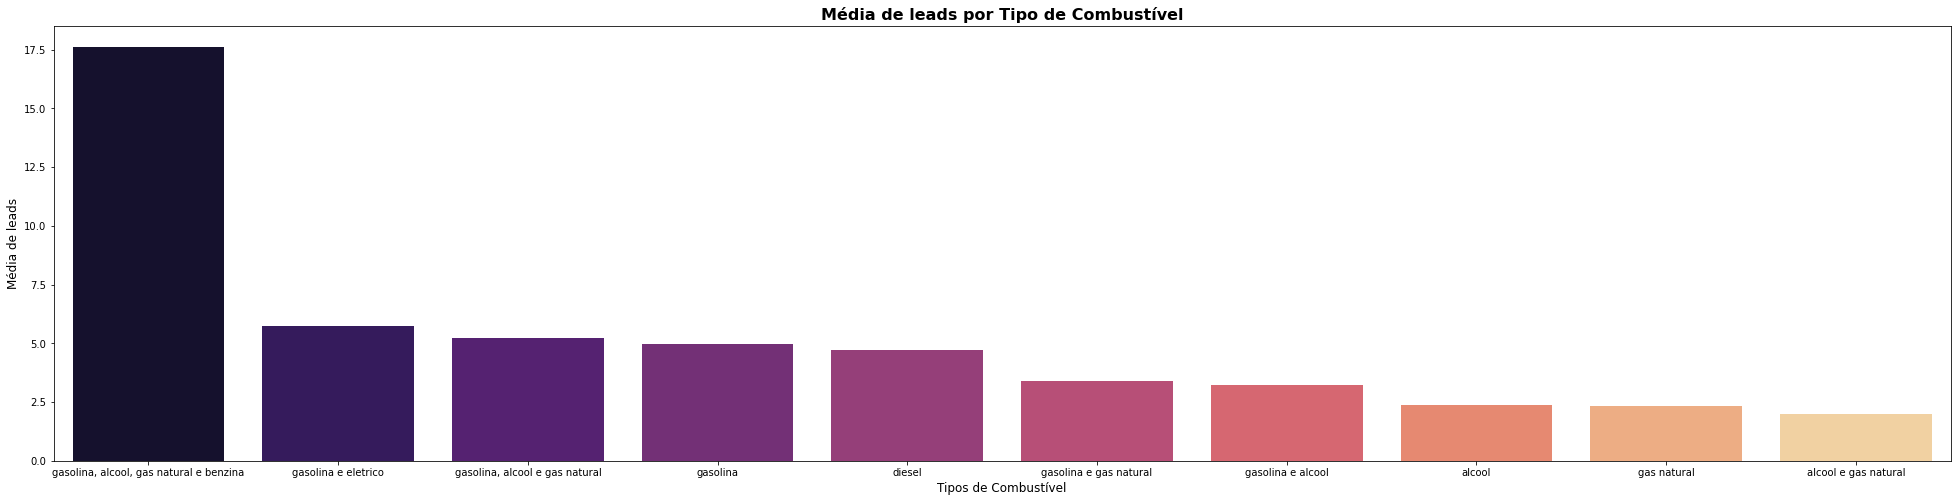

In [99]:
# Barplot da Média do número de leads por estado
plt.figure(figsize = (34,8))

sns.barplot(data = df_comb, x = df_comb.index, y = df_comb.leads, palette = 'magma')
plt.title('Média de leads por Tipo de Combustível', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Tipos de Combustível', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Carros que aceitam todos os tipos de combustíveis são, isoladamente, os que mais recebem leads. No entanto, esses tipo de automóveis não são muito comuns.  
Carros a gasolina e a diesel, que ja são carros que são mais frequentemente anunciados, possuem uma média de 4.9 e 4.7 respectivamente de leads por anuncio.

### Variável cambio

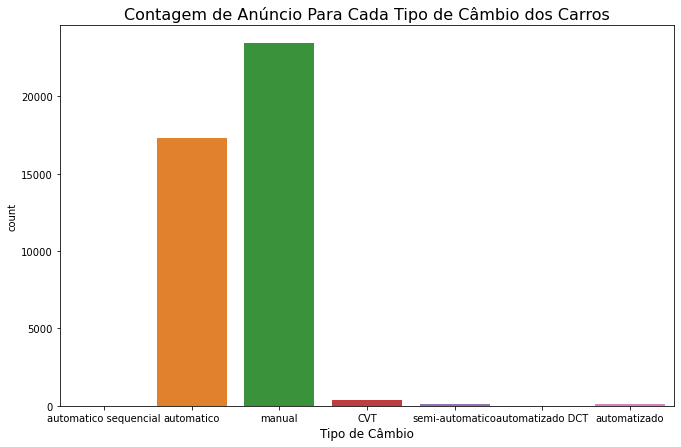

In [34]:
# Visualização da quantidade de anúncio pra cada tipo de câmbio.
plt.figure(figsize = (11,7))

sns.countplot(x = df.cambio)
plt.title('Contagem de Anúncio Para Cada Tipo de Câmbio dos Carros', fontdict={'fontsize':16})
plt.xlabel('Tipo de Câmbio', fontdict = {'fontsize': 12})
plt.show()

> Duas categorias de câmbio dominam no número de aparições: Manual, seguido por Automático

Relação do Tipo de Câmbio com a Variável Target 'leads'

In [100]:
# Agrupando a por câmbio
df_cambio = df_cat.groupby('cambio').agg({'leads':'mean'}).sort_values('leads', ascending = False)
df_cambio

,leads
cambio,
CVT,8.595801
automatizado,6.010638
automatizado DCT,5.285714
automatico,4.315963
manual,2.986718
semi-automatico,2.258929
automatico sequencial,0.250000


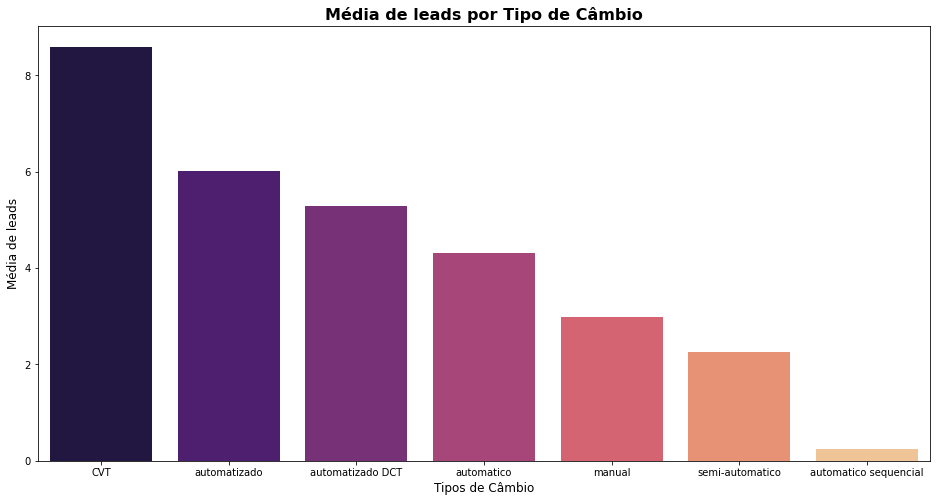

In [102]:
# Barplot da Média do número de leads por estado
plt.figure(figsize = (16,8))

sns.barplot(data = df_cambio, x = df_cambio.index, y = df_cambio.leads, palette = 'magma')
plt.title('Média de leads por Tipo de Câmbio', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Tipos de Câmbio', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Vemos que carros com câmbio do tipo CVT são os que mais recebem 'leads', seguido por automatizado e automatizado DCT.  
> No entanto, esses três tipos de câmbios não são tão populares entre os anúncios de carros.  
> Os tipos de câmbios mais populares (automático e manual) têm média de aproximadamente 4.3 e 3(respectivamente) leads por anúncios.

### Prioridade

In [255]:
# Quantidade de Anúncios Com Prioridade Baixa(3), Média(2) e Alta(1)
df.prioridade.value_counts()

3    32452
1     7048
2     1822
Name: prioridade, dtype: int64

In [268]:
df11 = df.copy()
df11['prioridade'] = np.where((df11['prioridade'] == 1), 'Alta',
                     np.where((df11['prioridade'] == 2), 'Media',
                     np.where((df11['prioridade'] == 3), 'Baixa',
                     0)))

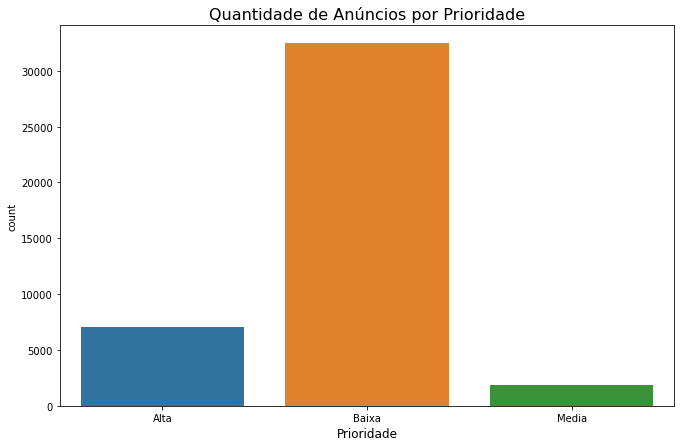

In [277]:
# Plot da quantidade de Anúncios por Prioridade
plt.figure(figsize = (11,7))

sns.countplot(x = df11.prioridade)
plt.title('Quantidade de Anúncios por Prioridade',fontdict={'fontsize':16})
plt.xlabel('Prioridade',fontdict={'fontsize':12})
plt.show()

In [281]:
# Agrupando a por Prioridade (Baixa(3), Média(2) e Alta(1))
df_prio = df11.groupby('prioridade').agg({'leads':'mean'}).sort_values('leads', ascending = False)
df_prio

,leads
prioridade,
Media,8.285950
Alta,5.869750
Baixa,2.844293


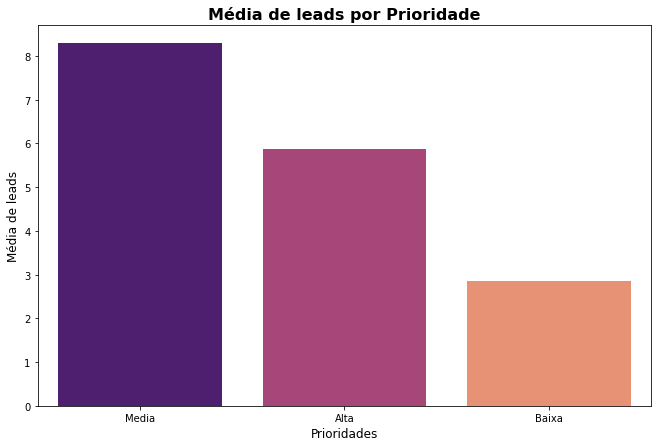

In [282]:
# Plot da média de leads em anúncios divido por prioridade
plt.figure(figsize = (11,7))

sns.barplot(data = df_prio, x = df_prio.index, y = df_prio['leads'], palette = 'magma')
plt.title('Média de leads por Prioridade', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Prioridades', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Anúncios com prioridade baixa costumam ter menos número de leads.  


### cod_marca/versao/modelo_veiculo

In [283]:
df[['cod_marca_veiculo','cod_modelo_veiculo','cod_versao_veiculo']].nunique()

cod_marca_veiculo       44
cod_modelo_veiculo     428
cod_versao_veiculo    2881
dtype: int64

> Existem muitos modelos e versões de carros, e como eles estão representados por números, fica dificil conseguir relacioná-los em conjunto com o número de leads. Não conseguiriamos saber, por exemplo, se os 3 primeiros modelos de carros têm alguma relação entre si para inferir que 'x' modelo de carro tende a ter mais leads

In [285]:
# Relação da marca de veiculos com o número de leads
df_marca = df.groupby('cod_marca_veiculo').agg({'leads':'mean'})
df_marca.head()

,leads
cod_marca_veiculo,
2,3.201123
3,3.338371
4,2.582201
5,3.444425
8,5.038182


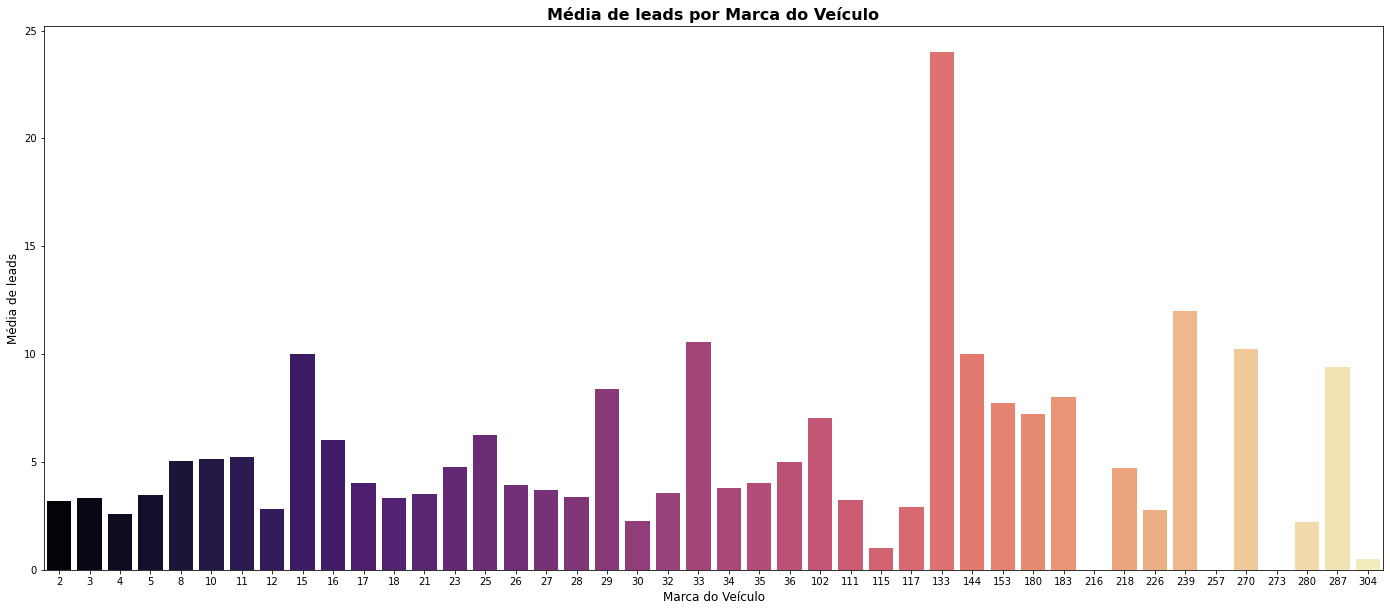

In [287]:
# Plot da média de leads em anúncios divido por prioridade
plt.figure(figsize = (24,10))

sns.barplot(data = df_marca, x = df_marca.index, y = df_marca['leads'], palette = 'magma')
plt.title('Média de leads por Marca do Veículo', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Marca do Veículo', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Conseguimos concluir que carros da marca 133 têm uma média de leads significantemente maior que seus concorrentes

### Ano modelo

In [311]:
# Verificando a quantidade de anúncios com diferentes anos de veículos
df.ano_modelo.nunique()

45

In [315]:
df.ano_modelo.value_counts()[:10]

2015    5819
2014    5413
2016    4780
2013    4637
2017    4056
2012    3581
2018    3568
2011    2750
2010    1965
2009    1393
Name: ano_modelo, dtype: int64

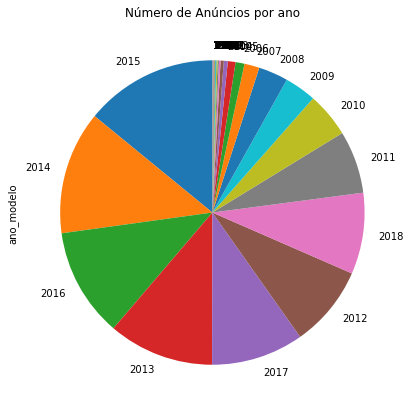

In [332]:
df.ano_modelo.value_counts().plot(kind = 'pie', figsize = (11,7), title = 'Número de Anúncios por ano', startangle= 90)

> Possível ver que apesar de haver carros com modelos de 45 anos diferentes, carros com ano de 2012 a 2018 (7 anos) representam mais de 75% de todos os anúncios

In [331]:
# Relação dos carros de 2012 a 2018 com a variável target leads
df_ano = df.groupby('ano_modelo').agg({'leads':'mean'})
df_ano = df_ano.sort_values('ano_modelo', ascending= False)[:8]
df_ano

,leads
ano_modelo,
2019,2.725490
2018,3.019619
2017,3.386834
2016,3.039331
2015,3.441657
2014,3.595788
2013,3.773992
2012,3.759844


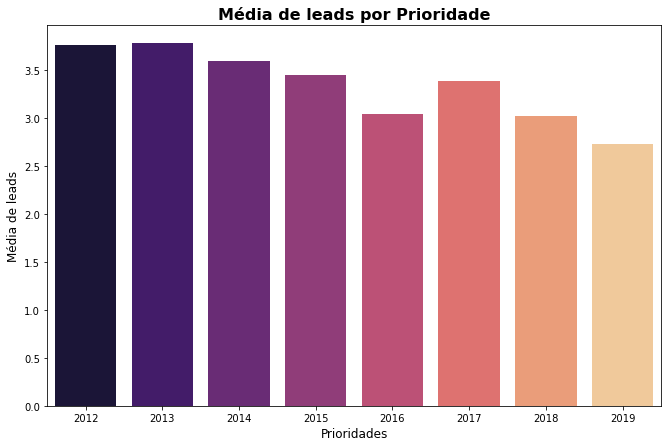

In [333]:
# Plot da média de leads em anúncios divido por prioridade
plt.figure(figsize = (11,7))

sns.barplot(data = df_ano, x = df_ano.index, y = df_ano['leads'], palette = 'magma')
plt.title('Média de leads por Prioridade', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Prioridades', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Com exceção do ano de 2017, a média de leads dos anúncios de carro com modelo a partir de 2012 (até 2019) tendem a diminuir com o passar dos anos.  
> No entanto, a diferença é muito pequena.

### Portas

### Variáveis Binárias

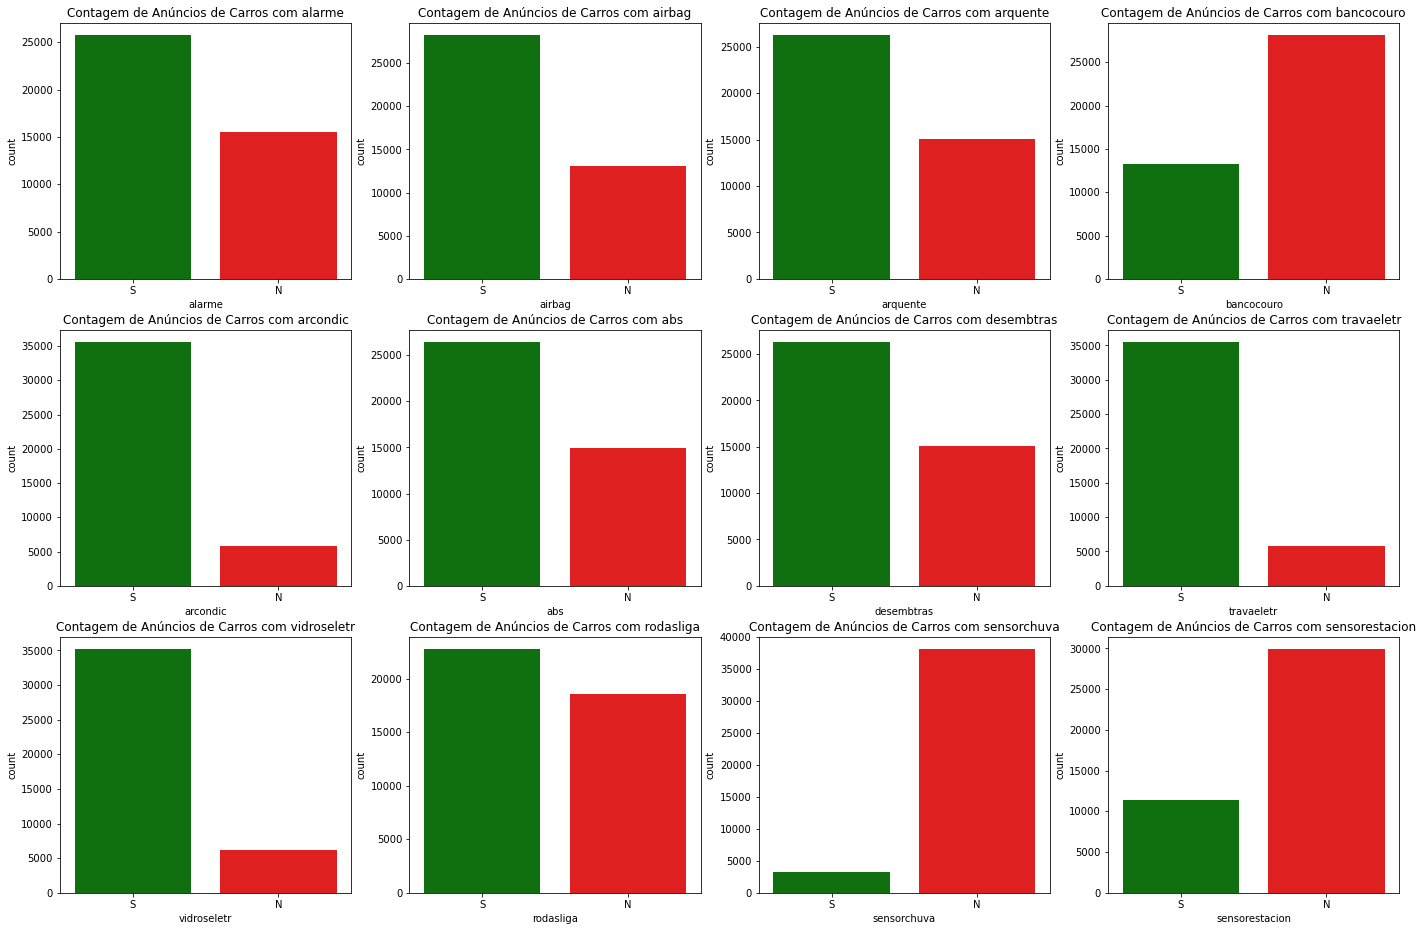

In [35]:
# Visualização das das variáveis 'categóricas' binárias
plt.figure(figsize = (24,16))

for i in range(3, len(obj_list)):
    plt.subplot(3,4, i+1-3)

    sns.countplot(data = df, x = df[obj_list[i]], palette=  ['green','red'])
    plt.title(f'Contagem de Anúncios de Carros com {obj_list[i]}', fontdict={'fontsize':12})

In [ ]:
# Outras variáveis binárias
df_cat_bi2 = df[['leads','flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago','flg_todas_revisoes_concessionaria','flg_todas_revisoes_agenda_veiculo',
                 'flg_garantia_fabrica','flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd']]

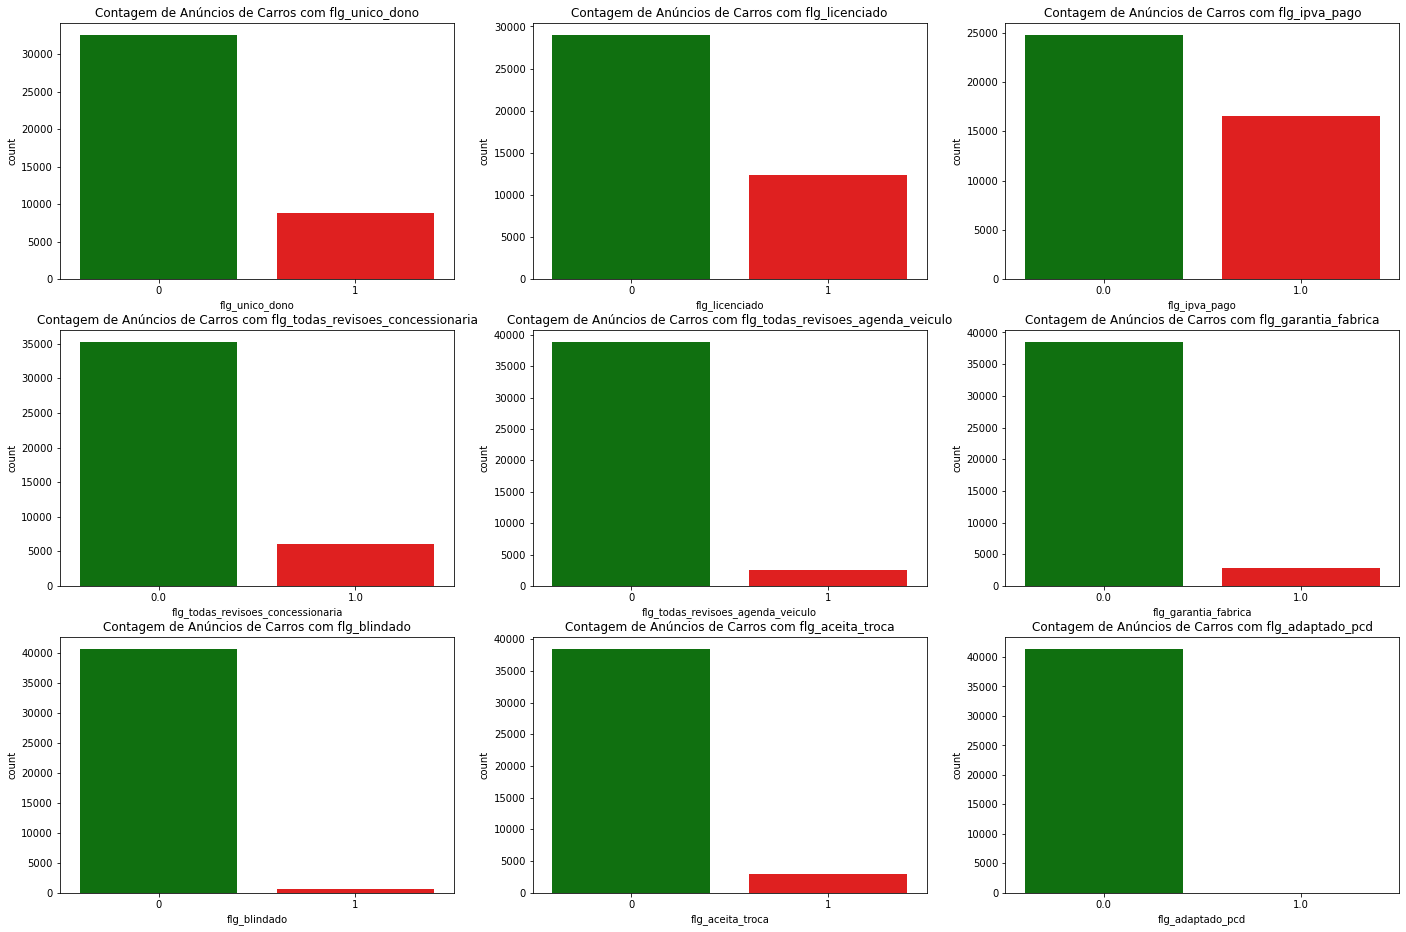

In [113]:
# Visualização dos restante das variáveis 'categóricas' binárias
plt.figure(figsize = (24,16))

for i in range(1, len(df_cat_bi2.columns)):
    plt.subplot(3,3, i)

    sns.countplot(data = df, x = df[df_cat_bi2.columns[i]], palette =  ['green','red'])
    plt.title(f'Contagem de Anúncios de Carros com {df_cat_bi2.columns[i]}', fontdict={'fontsize':12})

No entanto, ainda faltaram algumas variáveis nessa mapa de calor, que estão representadas por S e N (para Sim e Não).  
Vamos transformá-las em 1 e 0 (S=1, N=0)

In [39]:
df_cat_bi = df_cat[['alarme', 'airbag', 'arquente', 'bancocouro', 'arcondic', 'abs',
        'desembtras', 'travaeletr', 'vidroseletr', 'rodasliga', 'sensorchuva', 'sensorestacion']]

In [115]:
# for i in range(0, len(df_cat_bi.columns)):
    
#     df_cat_bi[(df_cat_bi.columns[i])] = np.where(df_cat_bi[df_cat_bi.columns[i]] == 'S', 1, 0)

### Feature Engineer

* Separando a coluna 'uf_cidade' em duas ('uf', 'cidade')

In [44]:
# Podemos separar a variável uf_cidade em duas colunas (uf, cidade)
df.uf_cidade.head()

2                       SP_PoÃ¡
3                 SP_SÃ£o Paulo
4     SP_SÃ£o Bernardo do Campo
9      SP_SÃ£o JosÃ© dos Campos
21    SP_SÃ£o Bernardo do Campo
Name: uf_cidade, dtype: object

In [45]:
# Separando a coluna uf_cidade em 'uf' e 'cidade'
df[['uf', 'cidade']] = df.uf_cidade.str.split('_', expand = True)

In [46]:
# Reposicionando as colunas 'uf' e 'cidade'
df.insert(12, 'uf', df.pop('uf'))
df.insert(13, 'cidade', df.pop('cidade'))

In [47]:
# Removendo a coluna uf_cidade
df.pop('uf_cidade')

2                          SP_PoÃ¡
3                    SP_SÃ£o Paulo
4        SP_SÃ£o Bernardo do Campo
9         SP_SÃ£o JosÃ© dos Campos
21       SP_SÃ£o Bernardo do Campo
                   ...            
42152                SP_SÃ£o Paulo
42153                    SP_AvarÃ©
42154                SP_SÃ£o Paulo
42155                SP_SÃ£o Paulo
42156                SP_SÃ£o Paulo
Name: uf_cidade, Length: 41322, dtype: object

In [48]:
df.head()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf,cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
2,95,16462,1,1,0,0,6,12,2722,342061,2010,8,SP,PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,S,S,S,S,S,S,S,S,S,S,S,S
3,110,1987,1,1,0,0,2,2,1161,339241,2009,1,SP,SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
4,117,18367,1,1,0,0,10,3,687,344077,2010,9,SP,SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,N,N,S,N,S,N,S,S,S,S,N,N
9,200,16006,1,1,0,0,13,2,2950,342268,2012,12,SP,SÃ£o JosÃ© dos Campos,44000.0,5,140000,45785.57787,1,1,1.0,1.0,1,1.0,0,0,0.0,gasolina,automatico,4.0,S,S,S,S,S,S,S,S,S,S,N,N
21,303,80,1,3,0,0,8,3,1146,339886,2008,9,SP,SÃ£o Bernardo do Campo,18800.0,7,155000,20273.00157,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina e alcool,manual,4.0,S,N,S,N,S,N,S,S,S,N,N,N


### Variável uf

In [208]:
# Contagem de aparições de cada estado no dataset
df_uf_count = df.groupby('uf').agg({'uf':'count'})
df_uf_count.rename(columns={'uf':'contagem'}, inplace = True)
df_uf_count  = df_uf_count.sort_values('contagem', ascending= False)
df_uf_count

,contagem
uf,
SP,19069
PR,3988
SC,3524
RJ,3070
MG,2651
RS,2206
DF,1483
GO,744
PE,685


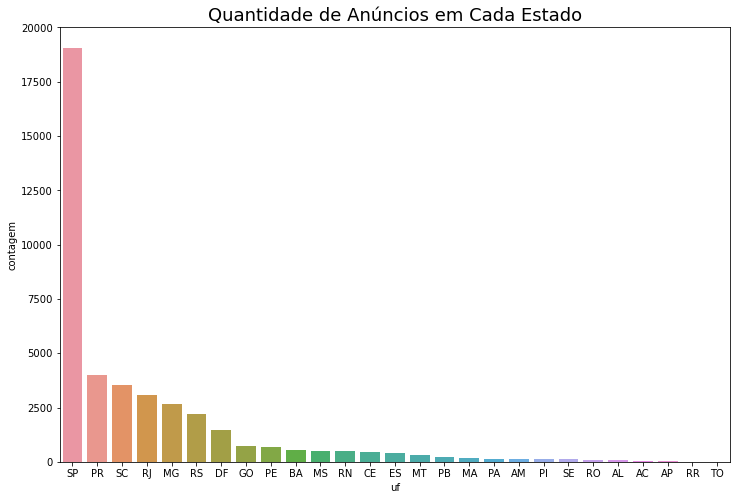

In [209]:
plt.figure(figsize = (12,8))

sns.barplot(data = df_uf_count, x = df_uf_count.index, y = df_uf_count.contagem)
plt.title('Quantidade de Anúncios em Cada Estado', fontdict={'fontsize': 18})
plt.show()

In [49]:
# Agrupando o df por uf e extraindo a média de leads
df_uf = df.groupby('uf').agg({'leads':'mean'}).sort_values('leads', ascending = False)
df_uf.head()

,leads
uf,
SP,5.350097
AC,3.761905
RJ,3.246906
GO,2.563172
MG,2.507733


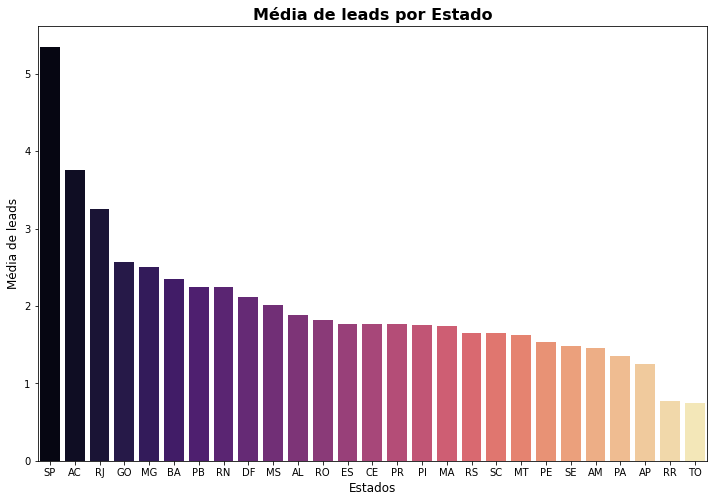

In [50]:
# Barplot da Média do número de leads por estado
plt.figure(figsize = (12,8))

sns.barplot(data = df_uf, x = df_uf.index, y = df_uf.leads, palette = 'magma')
plt.title('Média de leads por Estado', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Estados', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()


Podemos notar que anúncios de SP tem uma média de leads por anúncio significantemente maior que os outros estados.  
Surpreendentemente, o estado do AC bem vem em segundo, com uma média de 3,76 leads por anúncio, seguidos por RJ, GO e MG.

No entanto, vale ressaltar que o estado de AC, apesar do alto número de leads por anúncio, possui pouquissima amostragem, com apenas 21 anuncios.

### Variável cidade

In [211]:
df_cid_count = df.groupby('cidade').agg({'cidade':'count'})
df_cid_count.rename(columns={'cidade':'contagem'}, inplace = True)
df_cid_count  = df_cid_count.sort_values('contagem', ascending= False)
df_cid_count

,contagem
cidade,
SÃ£o Paulo,7136
Rio de Janeiro,1841
Curitiba,1825
BrasÃ­lia,1477
Belo Horizonte,1183
...,...
Rio Brilhante,1
Cruz das Almas,1
Major Vieira,1


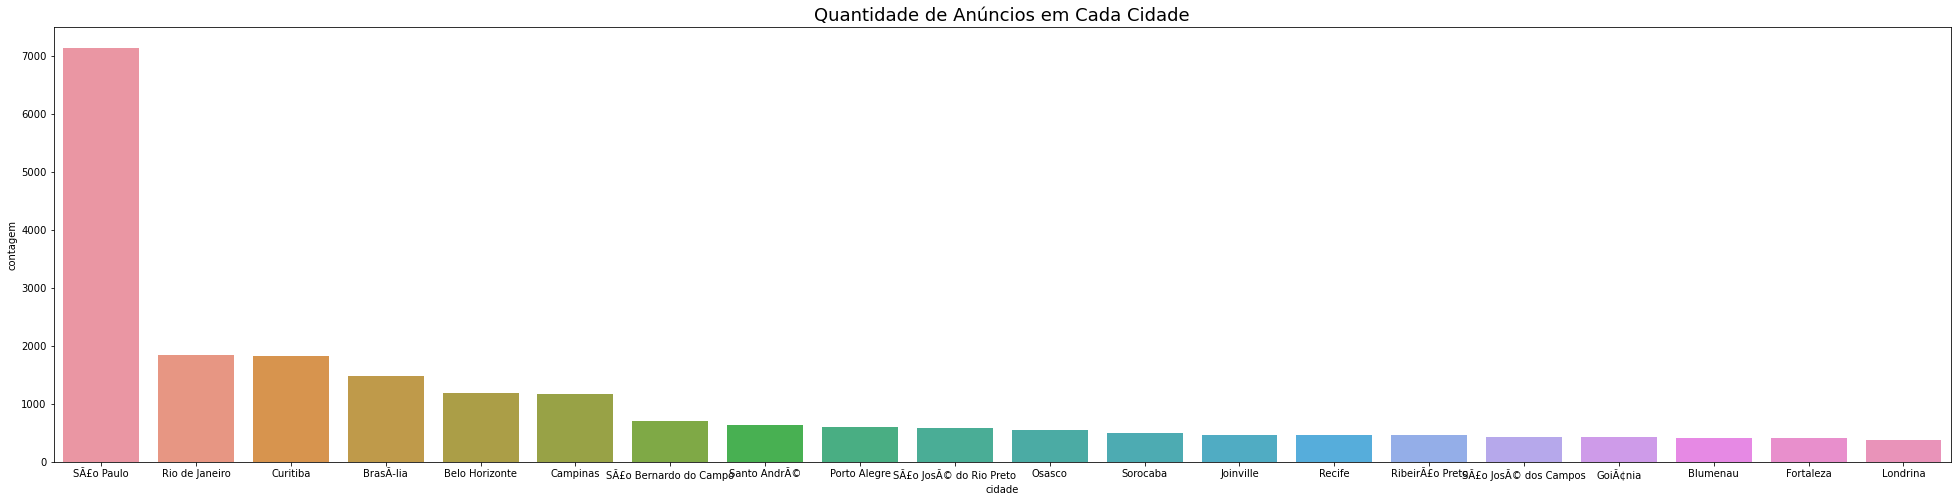

In [215]:
# Plot do top 20 cidades com mais anúncios
plt.figure(figsize = (34,8))

sns.barplot(data = df_cid_count, x = df_cid_count.index[:20], y = df_cid_count.contagem[:20])
plt.title('Quantidade de Anúncios em Cada Cidade', fontdict={'fontsize': 18})
plt.show()


In [51]:
# Agrupando o df por cidade(e uf, para conseguirmos saber de que estado é aquela cidade) e extraindo a média de leads
df_cid = df.groupby(['uf','cidade']).agg({'leads':'mean'}).sort_values('leads', ascending= False)
df_cid

leads
uf cidade                
SP São Paulo       48.000
   Jarinu          28.000
RJ Japeri          28.000
SP Monte Mor       28.000
   Nhandeara       20.125
...                   ...
CE Caucaia          0.000
SP CesÃ¡rio Lange   0.000
BA Valente          0.000
   Serrinha         0.000
MG Inhapim          0.000

[844 rows x 1 columns]

In [52]:
df_cid = df_cid.reset_index()
df_cid.head(3)

,uf,cidade,leads
0,SP,São Paulo,48.0
1,SP,Jarinu,28.0
2,RJ,Japeri,28.0


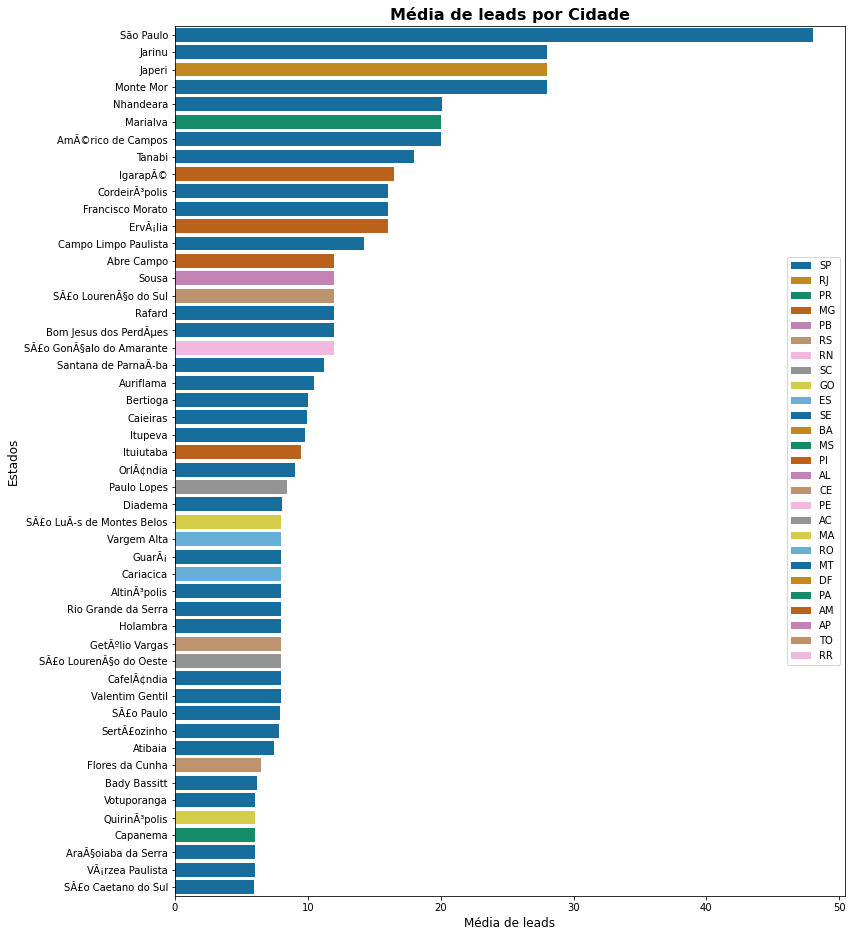

In [216]:
# Barplot da Média do número de leads por cidade
# Como temos mais de 800 registros, vamos plotar apenas as 30 cidades com maior número de leads
plt.figure(figsize = (12,16))

sns.barplot(data = df_cid[0:50], y = df_cid.cidade[0:50], x = df_cid.leads[0:50], palette = 'colorblind', hue = df_cid.uf, dodge = False)
plt.title('Média de leads por Cidade', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Média de leads', fontdict = {'fontsize': 12})
plt.ylabel('Estados', fontdict = {'fontsize': 12})
plt.legend(loc = 'right')
plt.show()

> Pudemos confirmar a dominância do estado de SP nas cidades com as maiores médias de leads por anúncio.

> Das cidades com mais anúncios, apenas a capital São Paulo aparece com o maior número de leads

### Plotagem de variáveis binárias

In [54]:
df_cat_bi.columns

Index(['leads', 'alarme', 'airbag', 'arquente', 'bancocouro', 'arcondic',
       'abs', 'desembtras', 'travaeletr', 'vidroseletr', 'rodasliga',
       'sensorchuva', 'sensorestacion'],
      dtype='object')

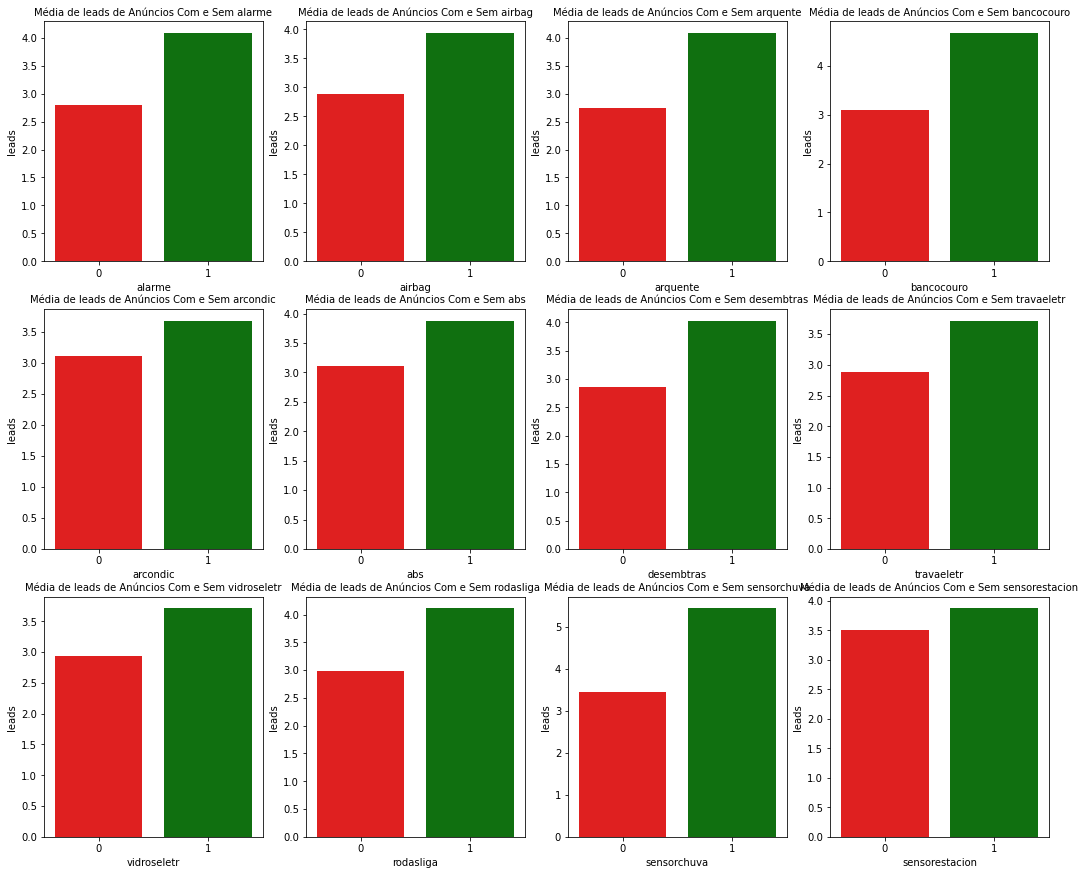

In [55]:
# Plot da média de leads para algumas variáveis categóricas
# 0 -> Não, 1 -> Sim

plt.figure(figsize = (18,15))

for i in range(1,len(df_cat_bi.columns)):
    
    plt.subplot(3,4, i)
    
    df_plot = df_cat_bi.groupby(df_cat_bi.columns[i]).agg({'leads':'mean'})
    df_plot = df_plot.reset_index()
    df_plot.leads = df_plot.leads.apply(lambda x: round(x,2))
    sns.barplot(data = df_plot, y = df_plot.leads, x = df_plot[df_cat_bi.columns[i]], palette = ['red','green'])
    plt.title(f'Média de leads de Anúncios Com e Sem {df_cat_bi.columns[i]}', fontdict = {'fontsize':10})

Pudemos notar que anúncios que tinham acessórios 'extras', tiveram maior número de leads

In [56]:
df.columns

Index(['cod_anuncio', 'cod_cliente', 'cod_tipo_pessoa', 'prioridade', 'leads',
       'views', 'cliques_telefone*', 'cod_marca_veiculo', 'cod_modelo_veiculo',
       'cod_versao_veiculo', 'ano_modelo', 'cep_2dig', 'uf', 'cidade',
       'vlr_anuncio', 'qtd_fotos', 'km_veiculo', 'vlr_mercado',
       'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago',
       'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
       'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro',
       'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
       'rodasliga', 'sensorchuva', 'sensorestacion'],
      dtype='object')

In [57]:
df_cat_bi2 = df[['leads','flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago','flg_todas_revisoes_concessionaria','flg_todas_revisoes_agenda_veiculo',
                 'flg_garantia_fabrica','flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd']]

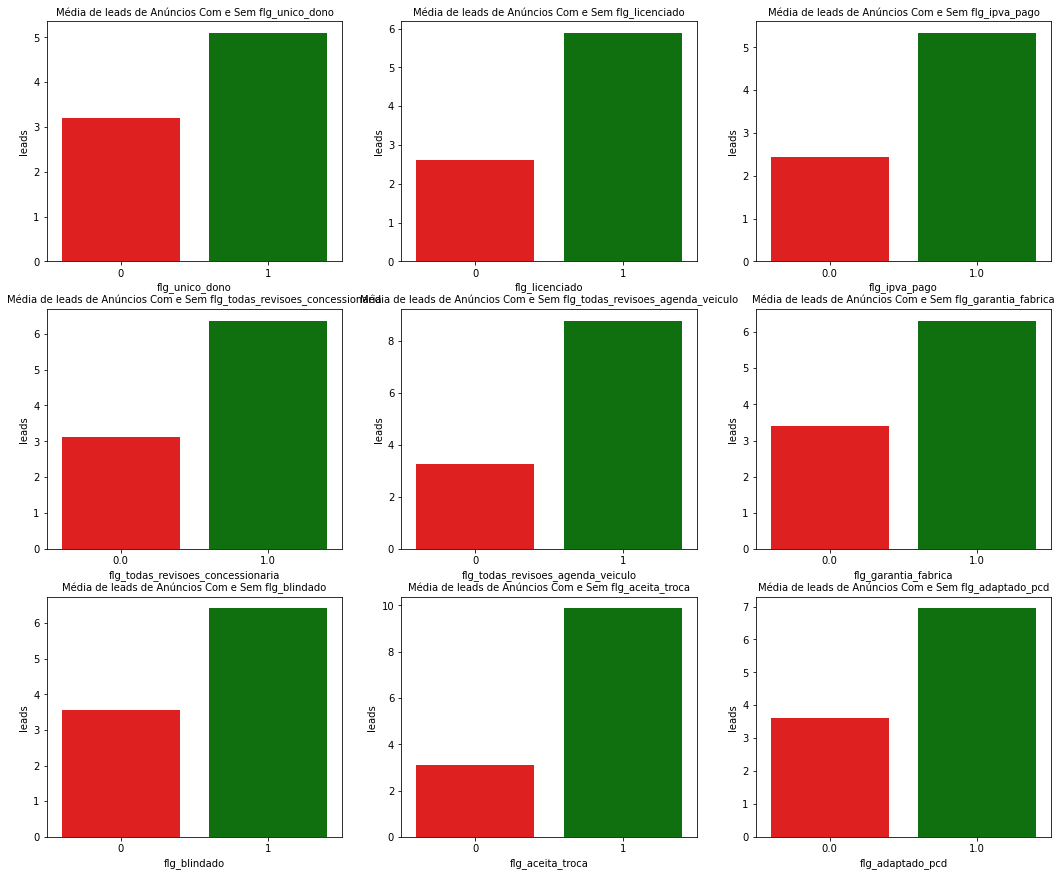

In [59]:
# Plot da média de leads para as variáveis categóricas binárias restantes
# 0 -> Não, 1 -> Sim

plt.figure(figsize = (18,15))

for i in range(1,len(df_cat_bi2.columns)):
    
    plt.subplot(3,3, i)
    
    df_plot = df_cat_bi2.groupby(df_cat_bi2.columns[i]).agg({'leads':'mean'})
    df_plot = df_plot.reset_index()
    df_plot.leads = df_plot.leads.apply(lambda x: round(x,2))
    sns.barplot(data = df_plot, y = df_plot.leads, x = df_plot[df_cat_bi2.columns[i]], palette = ['red','green'])
    plt.title(f'Média de leads de Anúncios Com e Sem {df_cat_bi2.columns[i]}', fontdict = {'fontsize':10})

Novamente, pudemos notar que anúncios que possuiam mais acessórios/opções, obtiveram maior número de leads

## Variáveis Numéricas

In [66]:
df_num = df[num_var]

In [67]:
df_num.head(5)

,leads,views,cliques_telefone*,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado
2,0,0,6,31900.0,8,74000,26875.00573
3,0,0,2,25500.0,8,128000,23779.45322
4,0,0,10,23990.0,6,60000,22428.12461
9,0,0,13,44000.0,5,140000,45785.57787
21,0,0,8,18800.0,7,155000,20273.00157


In [68]:
df_num.describe()

,leads,views,cliques_telefone*,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado
count,41322.000000,41322.000000,41322.000000,4.132200e+04,41322.000000,4.132200e+04,41322.000000
mean,3.600261,418.666473,6.569963,8.574010e+04,6.681138,2.126215e+05,52595.959593
std,8.712076,604.503062,8.842611,1.570972e+06,2.137584,1.421112e+07,41158.547585
min,0.000000,0.000000,0.000000,4.900000e+03,0.000000,0.000000e+00,6292.843540
25%,1.000000,88.000000,2.000000,3.090000e+04,6.000000,3.400000e+04,31366.764470
50%,1.000000,212.000000,4.000000,3.999000e+04,8.000000,5.926450e+04,40607.151760
75%,4.000000,472.000000,8.000000,6.089000e+04,8.000000,8.953100e+04,61358.535275
max,348.000000,4872.000000,205.000000,1.220000e+08,20.000000,2.147484e+09,921239.188800


Não temos dicionarios para saber o que siginifica as colunas 'cod_marca_veiculo', 'cod_modelo_veiculo' e 'cod_versao_veiculo'.

> A grande maioria dos anuncios possuem lead baixos, cerca de 75% deles estão com até 4 leads (média de 3.6)

### Feature Engineering

In [86]:
# Vamos adicionar uma variável que mede o valor do anúncio comparado ao valor de mercado, para posteriormente compararmos com a variáavel 'lead'
df_num['vlr_anuncio/mercado'] = df_num.vlr_anuncio / df_num.vlr_mercado

c:\Users\rafae\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
df_num['vlr_anuncio/mercado'].describe()

count    41322.000000
mean         1.543564
std         23.201835
min          0.254317
25%          0.960987
50%          0.997143
75%          1.023355
max       1135.368309
Name: vlr_anuncio/mercado, dtype: float64

### Correlação

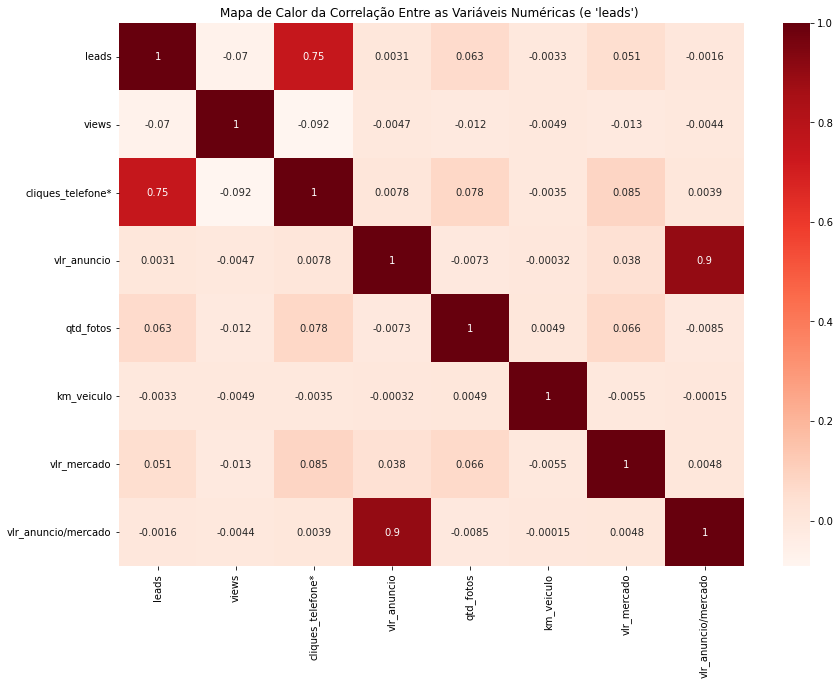

In [71]:
# Correlação das variáveis numéricas com a coluna 'leads'
# Heatmap

plt.figure(figsize = (14,10))


sns.heatmap(df_num.corr(), annot = True, cmap = 'Reds')
plt.title("Mapa de Calor da Correlação Entre as Variáveis Numéricas (e 'leads') ")
plt.show()

É possível ver um correlação entre a variável 'leads' e 'cliques_telefone*'.  
Todas as outras variáveis não parecem ter forte correlação, inclusive a variável criada valor_anuncio/valor_mercado

In [72]:
df.reset_index(drop = True, inplace = True)

### Relação Leads x cliques_telefone

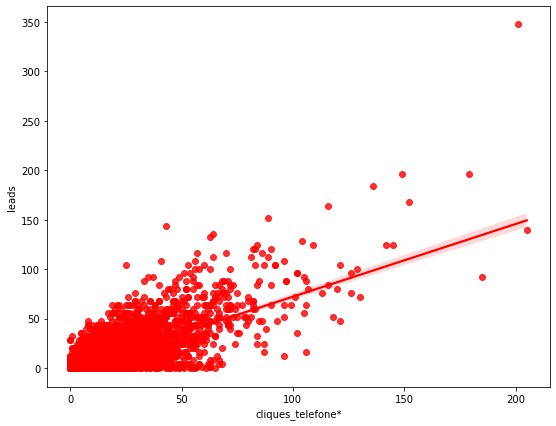

In [73]:
plt.figure(figsize=(9,7))

sns.regplot(data = df, x = 'cliques_telefone*', y = 'leads', color = 'r');

Podemos notar uma relação positiva do numero de cliques no telefone com o numero de 'leads'.  

### Relação Leads x Views

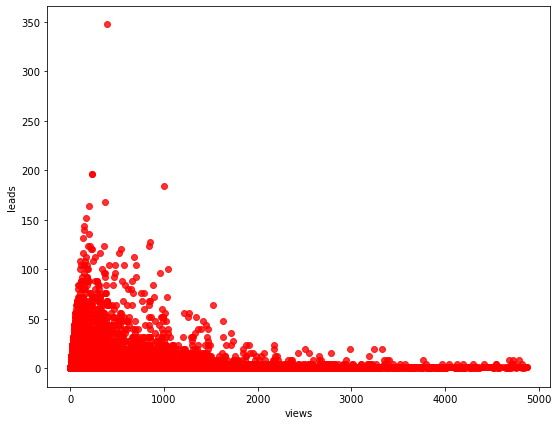

In [74]:
plt.figure(figsize=(9,7))

sns.regplot(data = df, x = 'views', y = 'leads', color = 'r');

Como visto no mapa de correlações, não há uma forte correlação entre as variaveis 'leads' e 'views'.  
No entanto, acredito que a variável 'view' devesse uma correlação mais forte a variável 'leads'.  
Iremos tentar retirar valores outliers dessas variáveis para verificar se teremos um resultado diferente.

In [75]:
df[['leads', 'views']].describe()

,leads,views
count,41322.000000,41322.000000
mean,3.600261,418.666473
std,8.712076,604.503062
min,0.000000,0.000000
25%,1.000000,88.000000
50%,1.000000,212.000000
75%,4.000000,472.000000
max,348.000000,4872.000000


In [76]:
# Temos 1095 registros considaderados como outliers na coluna views que poderão ser tratados posteriormente
# Temos 766 registros considaderados como outliers na coluna views que poderão ser tratados posteriormente

In [77]:
# Criando um dataframe para alterar e analisar os dados
df_eda = df.copy()

In [78]:
# Retirando os outliers da coluna view
df_eda = df_eda[(np.abs(stats.zscore(df_eda.views)) < 3)]

In [79]:
# Retirando os outliers da coluna leads
df_eda = df_eda[(np.abs(stats.zscore(df_eda.leads)) < 3)]

In [80]:
# Ainda resta 39461 registros
len(df_eda)

39461

In [81]:
# Mesmo após a retirada dos outliers, as variáveis não pareceram ter uma forte correlação entre elas.
df_eda[['leads','views']].corr()

,leads,views
leads,1.000000,-0.079524
views,-0.079524,1.000000


A correlação entre as variáveis diminuiu ainda mais.

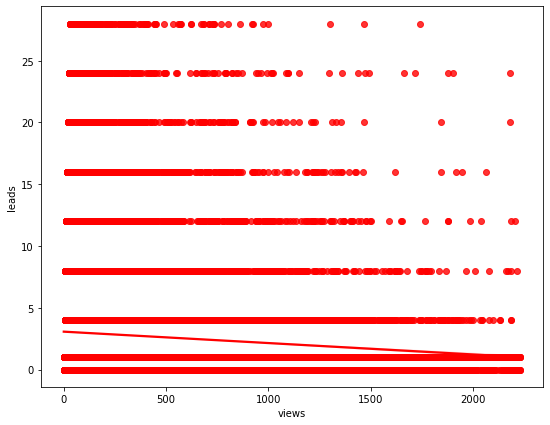

In [82]:
# plot das colunas 'leads' e 'views' após tratamento de outliers
plt.figure(figsize=(9,7))

sns.regplot(data = df_eda, x = 'views', y = 'leads', color = 'r');

Continuamos sem um relação significante entre as variáveis

# Pré Processamento de Dados

* Iremos usar variáveis que tiveram correlação de |0.15| ou maior